In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

### Importance of N for T-test

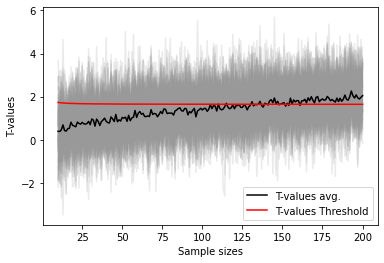

In [332]:
# Simulate random data for 2 groups
n = 1
sample_size = np.arange(10,201,n)
mean1 = 1
mean2 = 1.2
num_exps = 100
pval_thresh = .05

t = np.shape((num_exps))
p = np.shape((num_exps))

t_matrix = np.zeros((len(sample_size),num_exps))
# t_matrix2 = np.zeros((len(sample_size),num_exps))

for exp in range(num_exps):
    for samp in range(len(sample_size)):
    
        data1 = np.random.randn(sample_size[samp]) + mean1
        data2 = np.random.randn(sample_size[samp]) + mean2

        # Another option
#         t,_ = stats.ttest_ind(data1,data2,equal_var=True)
#         t_matrix2[samp,exp] = t  
        t_matrix[samp,exp] = stats.ttest_ind(data2,data1,equal_var=True)[0]

# Average T-value for each sample size
t_avg = np.mean(t_matrix,axis=1)

# T-values at threshold 0.05
t_thresh = np.zeros((len(sample_size)))

for i in range(len(sample_size)):
    df = (sample_size[i]+sample_size[i])-2
    t_thresh[i] = stats.t.ppf(1-pval_thresh,df)

plt.plot(sample_size,t_matrix,color=(.6,.6,.6,.2))
plt.plot(sample_size,t_avg,'k',label='T-values avg.')
plt.plot(sample_size,t_thresh,'r',label='T-values Threshold')
plt.xlabel('Sample sizes')
plt.ylabel('T-values')
# plt.xlim([10,15])
# plt.ylim([1.6,1.8])
plt.legend()
plt.show()